# Markov Chain Monte Carlo 

[Lecture Notes](https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/Lecture6_MCMC_Bayes.pdf)

### Common PDF: Beta Distribution: 
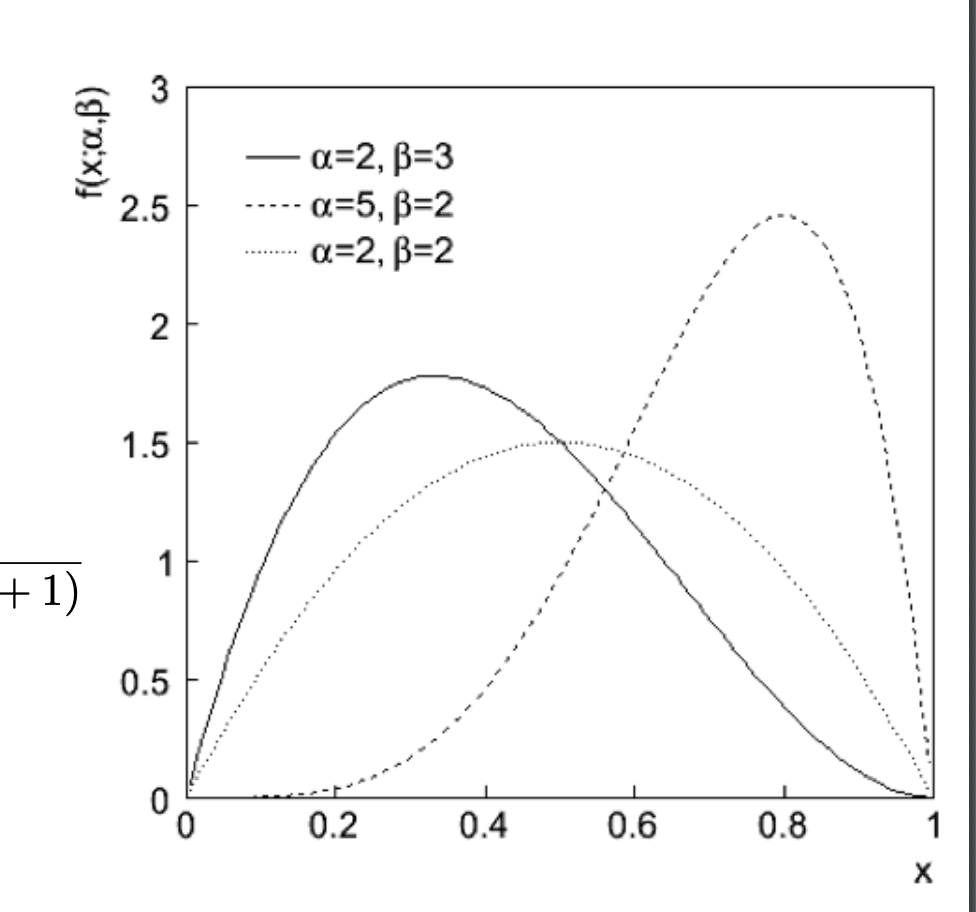
Uses two parameters: 
$$
f(x; \alpha,  \beta) = \frac{\tau(\alpha+ \beta)}{\tau(\alpha)\tau(\beta)}x^{\alpha -1}(x-1)^{\beta -1}
$$
Expectation: 
$$
E[x] = \frac{\alpha}{\alpha + \beta}
$$
Variance: 
$$
V[x] = \frac{\alpha\beta}{(\alpha+ \beta)^2(\alpha+ \beta+1)}
$$

### Numerical Limitations of estimating posterior distribution
* In exercise 1, we scanned through all of the values for $\theta$, but this will be infeasible for high numbers of parameters. 

## Posterior Distribution Sampling: 
* we know how to do minimization of negative log likelihoods, but I think, with the posterior calculation, we have too many interrelated variables... idk, there are more reasons for this too. 

## Markov Chain: 
A Markov chain is a stochastic process (random walk) of steps or state transitions that is only conditional on the current step/state. The transition from the current state to the next state is often, but not always, governed by a probability

* new state = f(current state, transition probability)
* markov (history of state doesn't matter) $P(x_{t+1}|X_1, X_2, X_3,..X_t) = P(x_{t+1}|.X_t)$
* Markov chains usually have a stationary distriubution $\pi(x)$

**requirements** 
1. Irreducible: means all values are reachable, regardless of where you start.  

    Example of fail: 
    a->b = .8
    c->b = .2
    e-> e = 100% (fail because e is not attached to other points.)
2. Aperiodic: the chains have no cycles. 
3. Ergodic: it can return to an point and doesn't get stuck in any point. 
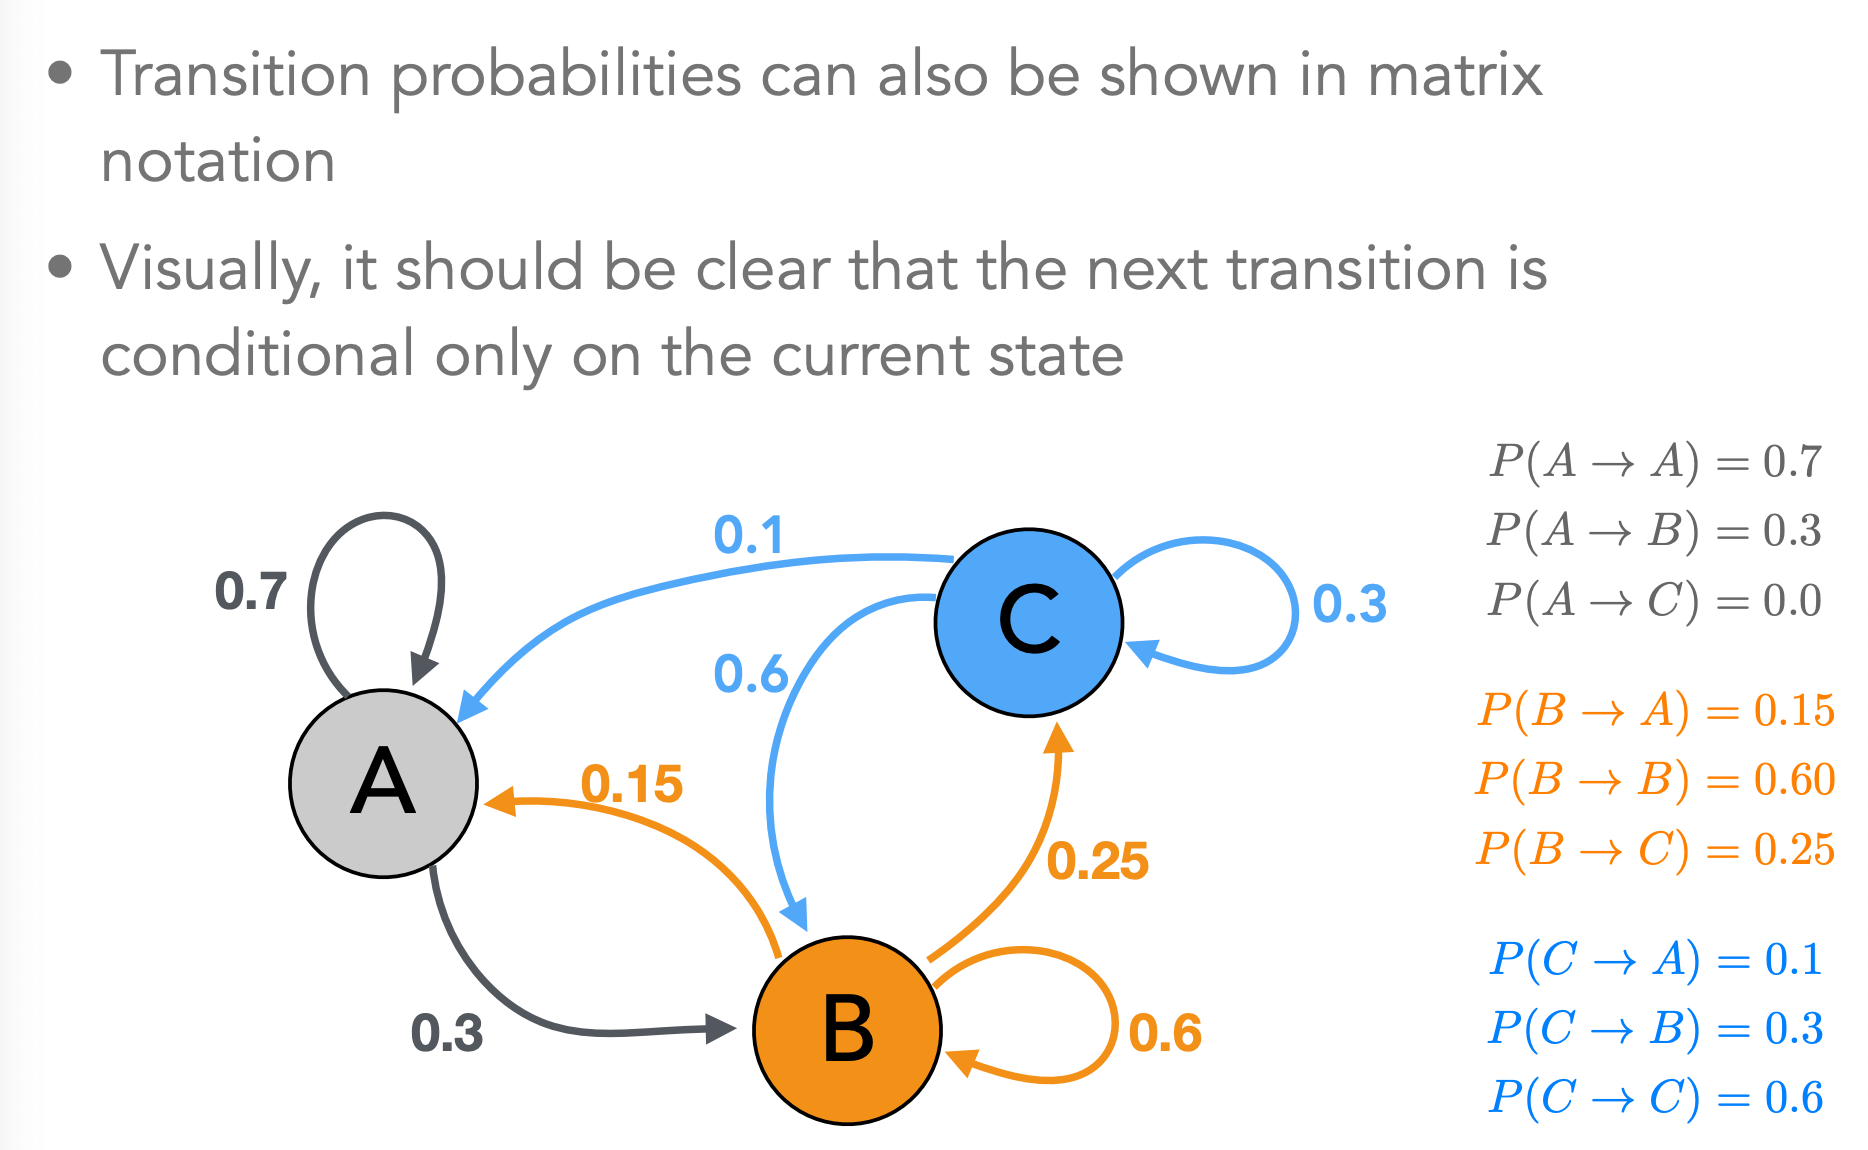

## Metropolis Hastings 




**Questions** 
* Is the Beta distribution normalized? 
* How would you tell if a given distribution is Gaussian? 

## Exercise #1: 
* Coin flipping bias with n throws/flips, but now in a Bayesian context where we want the prob. of coming up heads (θ)
* Likelihood is the standard binomial
* The prior is the beta-distribution with $\alpha$=5 and $\beta$=17
* Plot the prior, likelihood, and posterior distribution for n=100 coin flips with heads=66
* This is the repeat of a previous lecture’s exercise, but now with different priors, likelihoods, and posteriors
* Normalize them to be on the same scale for plotting
* Does not have to be normalized to 1 for this illustration purpose
* Normalizations for a binomial likelihood (and posterior distributions using a binomial likelihood) are summations instead of integrals

**Solution**
First we need to get the binomal distriubtion functions

This is just like lecture 4 with the fish. 

TODO: Review this example and add notes. 


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import pandas as pd
import scipy
import math 

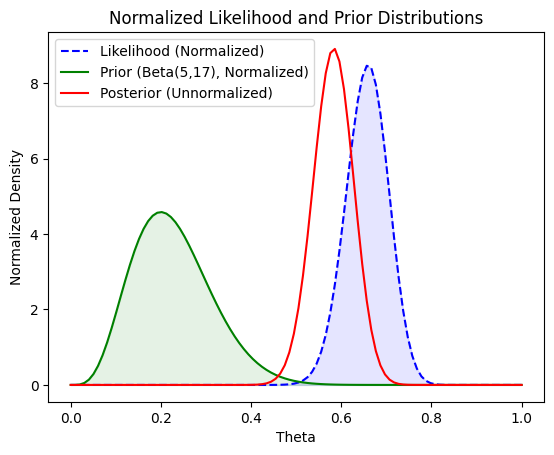

In [29]:

# Define binomial likelihood parameters
k = 66
n = 100

# Compute likelihood values
prob_linspace = np.linspace(0, 1, 100)
likelihood_values = scipy.stats.binom.pmf(k=k, n=n, p=prob_linspace)

# Normalize likelihood using numerical integration
likelihood_values /= np.trapz(likelihood_values, prob_linspace)

# Define Beta prior and normalize it
a, b = 5, 17
beta_prior = scipy.stats.beta(a, b).pdf(prob_linspace)
beta_prior /= np.trapz(beta_prior, prob_linspace)

# Compute the unnormalized posterior
posterior = likelihood_values * beta_prior
posterior /= np.trapz(posterior, prob_linspace)

# Plot the normalized likelihood and prior
plt.plot(prob_linspace, likelihood_values, label="Likelihood (Normalized)", linestyle="--", color="blue")
plt.plot(prob_linspace, beta_prior, label="Prior (Beta(5,17), Normalized)", linestyle="-", color="green")
plt.plot(prob_linspace, posterior, label="Posterior (Unnormalized)", linestyle="-", color="red")
plt.fill_between(prob_linspace, 0, likelihood_values, color="blue", alpha=0.1)
plt.fill_between(prob_linspace, 0, beta_prior, color="green", alpha=0.1)
plt.xlabel("Theta")
plt.ylabel("Normalized Density")
plt.title("Normalized Likelihood and Prior Distributions")
plt.legend()
plt.show()

## Exercise #2
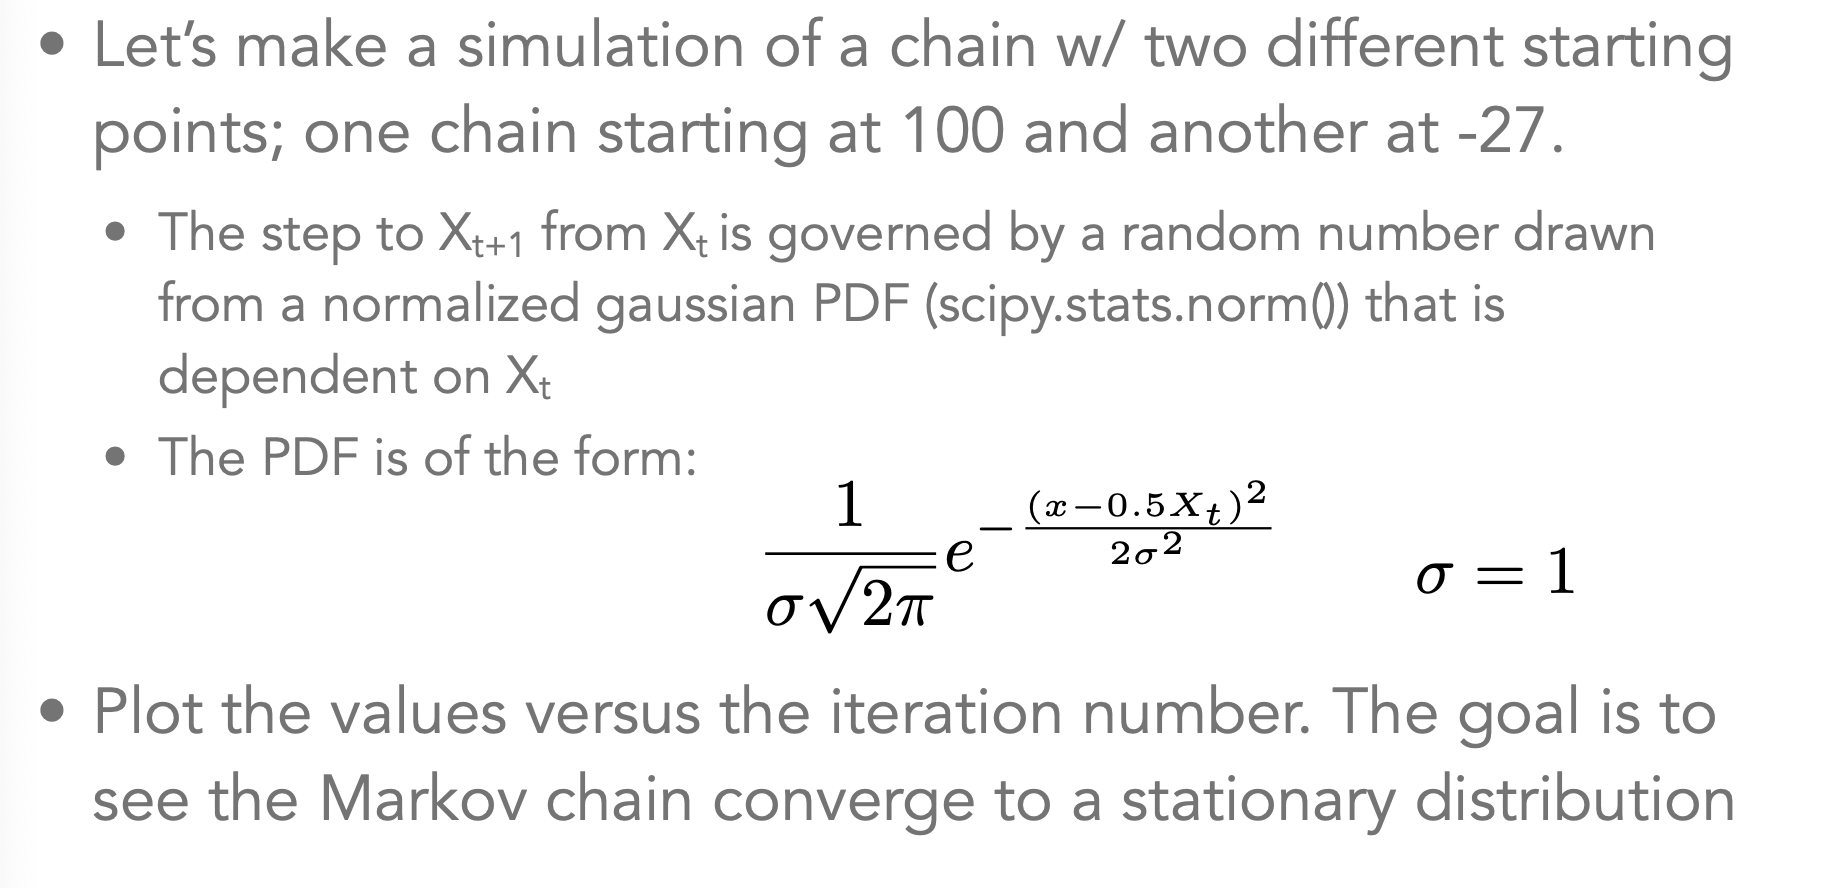

**Solution**
We initialize the transition probability distribution as the mean of the Gaussian distribution of our initial point. 

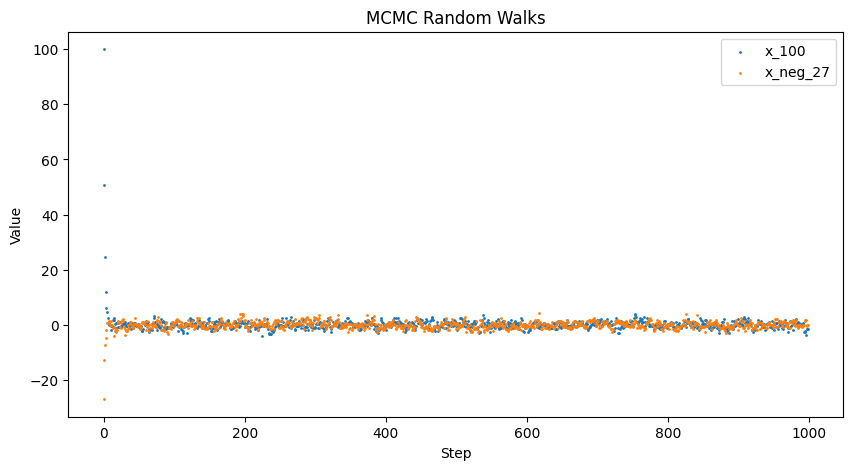

Text(0.5, 0, 'Value')

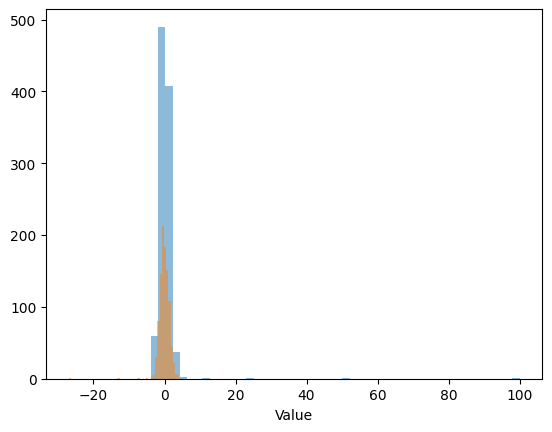

In [ ]:
def run_MCMC(x_initial, n_steps, trans_func):
    x = np.zeros(n_steps)
    x[0] = x_initial
    for i in range(1, n_steps):
        x[i] = trans_func(x[i-1])
    return x


n_steps = 1000  
x_initial = 100
makov_transition = lambda x: np.random.normal(.5*x, 1)
x_100 = run_MCMC(100, n_steps, trans_func=makov_transition)
x_neg_27 = run_MCMC(-27, n_steps, trans_func=makov_transition)


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(range(n_steps), x_100, label="x_100", s = 1)
ax.scatter(range(n_steps), x_neg_27, label="x_neg_27", s = 1)
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.title("MCMC Random Walks")
plt.show()

plt.hist(x_100, bins=50, alpha=0.5, label="x_100")
plt.hist(x_neg_27, bins=50, alpha=0.5, label="x_neg_27")
plt.xlabel("Value")

# c
